# Clustering Using K-Means Algorithm

# Practice

In [1]:
# general imports
import pandas as pd         
import numpy as np          
import matplotlib.pyplot as plt  
import seaborn as sb 
from numpy import mean
from numpy import std

# data preprocessing imports
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Model Building imports
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

# for plotting world map
from shapely.geometry import Point#x-y     
import geopandas as gpd                    
from geopandas import GeoDataFrame
import geopandas

#Filtering warnings
import warnings
warnings.filterwarnings('ignore')

# Task 1

In [2]:
#Importing dataset
df1=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S2_Cities_Data_Practice.csv')
df1.head()

,City,Country
0,Oakland,United States
1,Oakville,Canada
2,Oaxaca de Juárez,Mexico
3,Oberhausen,Germany
4,Obihiro,Japan


In [3]:
df2=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S2_WorldCities_Data_Practice.csv')
df2.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [4]:
df3=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S2_MoveHubCostOfLiving_Data_Practice.csv')
df3.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Lausanne,3.15,12.59,8.40,1.32,1714.00,4266.11
1,Zurich,3.28,12.59,8.40,1.31,2378.61,4197.55
2,Geneva,2.80,12.94,10.49,1.28,2607.95,3917.72
3,Basel,3.50,11.89,7.35,1.25,1649.29,3847.76
4,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55


In [5]:
df4=pd.read_csv(r'C:\Users\Admin\Desktop\Machine Learning\Repository\DS2_C6_S2_MoveHubQualityOfLife_Data_Practice.csv')
df4.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Caracas,65.18,11.25,44.44,83.45,8.61,85.70
1,Johannesburg,84.08,53.99,59.98,47.39,51.26,83.93
2,Fortaleza,80.17,52.28,45.46,66.32,36.68,78.65
3,Saint Louis,85.25,80.40,77.29,31.33,87.51,78.13
4,Mexico City,75.07,24.28,61.76,18.95,27.91,77.86


In [6]:
#Renaming 'city' feature of the worldcities dataset (df2) as'City'

df2=df2.rename(columns={'city':'City'})
df2.head()

,City,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [7]:
# Sorting the values of the 'populaion' of 'worldcities dataset (df2)' database in descending order

df2['population'].sort_values(ascending=False)

0       37977000.0
1       34540000.0
2       29617000.0
3       23355000.0
4       23088000.0
           ...    
9469           NaN
9470           NaN
9471           NaN
9472           NaN
9473           NaN
Name: population, Length: 26569, dtype: float64

In [8]:
#Removing the duplicate values of the city feature of the woldcities dataset by keeping the first value intact

df2.drop_duplicates(subset='City',keep='first',inplace=True)

In [9]:
#Merging all the data into a single object

data1=pd.merge(df1,df2,on='City')
data2=pd.merge(df3,df4,on='City')
df=pd.merge(data1,data2,on='City')
df.head()

,City,Country,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,...,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Orlando,United States,Orlando,28.4772,-81.3369,United States,US,USA,Florida,NaN,...,7.52,0.66,1176.78,2013.61,84.39,71.07,76.01,70.75,82.33,55.07
1,Oslo,Norway,Oslo,59.9111,10.7528,Norway,NO,NOR,Oslo,primary,...,12.32,1.57,2016.66,2800.92,82.09,52.51,88.19,29.39,71.27,35.53
2,Ottawa,Canada,Ottawa,45.4247,-75.6950,Canada,CA,CAN,Ontario,NaN,...,9.56,0.80,1020.02,2900.68,87.69,91.85,66.02,33.55,86.11,22.25
3,Oxford,United Kingdom,Oxford,51.7519,-1.2578,United Kingdom,GB,GBR,Oxfordshire,NaN,...,7.97,1.36,1494.67,1693.96,80.94,50.33,66.20,11.48,72.09,24.22
4,Quito,Ecuador,Quito,-0.2186,-78.5097,Ecuador,EC,ECU,Pichincha,primary,...,6.54,0.29,310.54,196.13,67.15,14.24,32.41,14.76,46.43,48.36


## Data Exploration

In [10]:
# shape of the dataset
print('The number of samples in data is {}.'.format(df.shape[0]))
print('The number of columns in data is {}.'.format(df.shape[1]))

The number of samples in data is 189.
The number of columns in data is 24.


In [11]:
# exploring the existing data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 0 to 188
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   189 non-null    object 
 1   Country                189 non-null    object 
 2   city_ascii             189 non-null    object 
 3   lat                    189 non-null    float64
 4   lng                    189 non-null    float64
 5   country                189 non-null    object 
 6   iso2                   189 non-null    object 
 7   iso3                   189 non-null    object 
 8   admin_name             188 non-null    object 
 9   capital                140 non-null    object 
 10  population             189 non-null    float64
 11  id                     189 non-null    int64  
 12  Cappuccino             189 non-null    float64
 13  Cinema                 189 non-null    float64
 14  Wine                   189 non-null    float64
 15  Gasoli

In [12]:
# exploring the numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lat,189.0,3.037615e+01,2.653546e+01,-4.353090e+01,2.132940e+01,4.069430e+01,4.925000e+01,6.344000e+01
lng,189.0,9.240169e+00,7.012665e+01,-1.578460e+02,-3.852750e+01,9.177500e+00,3.873690e+01,1.747833e+02
population,189.0,4.037046e+06,6.487168e+06,8.335000e+03,5.558050e+05,1.406000e+06,4.370000e+06,3.797700e+07
id,189.0,1.474223e+09,2.860600e+08,1.008162e+09,1.214636e+09,1.458989e+09,1.764069e+09,1.862748e+09
Cappuccino,189.0,1.999312e+00,7.411521e-01,4.600000e-01,1.320000e+00,2.090000e+00,2.490000e+00,4.480000e+00
Cinema,189.0,6.982011e+00,5.940213e+00,1.810000e+00,4.690000e+00,6.820000e+00,8.100000e+00,7.949000e+01
Wine,189.0,7.161164e+00,3.458427e+00,2.130000e+00,4.260000e+00,6.540000e+00,8.460000e+00,2.615000e+01
Gasoline,189.0,1.024339e+00,3.557210e-01,7.000000e-02,8.000000e-01,1.040000e+00,1.350000e+00,1.680000e+00
Avg Rent,189.0,1.120657e+03,6.734069e+02,1.206800e+02,6.321500e+02,9.964500e+02,1.458200e+03,5.052310e+03
Avg Disposable Income,189.0,1.427152e+03,8.984866e+02,1.206800e+02,5.870100e+02,1.534470e+03,2.045960e+03,4.266110e+03


In [13]:
# checking missing values in data
df.isnull().sum()

City                      0
Country                   0
city_ascii                0
lat                       0
lng                       0
country                   0
iso2                      0
iso3                      0
admin_name                1
capital                  49
population                0
id                        0
Cappuccino                0
Cinema                    0
Wine                      0
Gasoline                  0
Avg Rent                  0
Avg Disposable Income     0
Movehub Rating            0
Purchase Power            0
Health Care               0
Pollution                 0
Quality of Life           0
Crime Rating              0
dtype: int64

<AxesSubplot:>

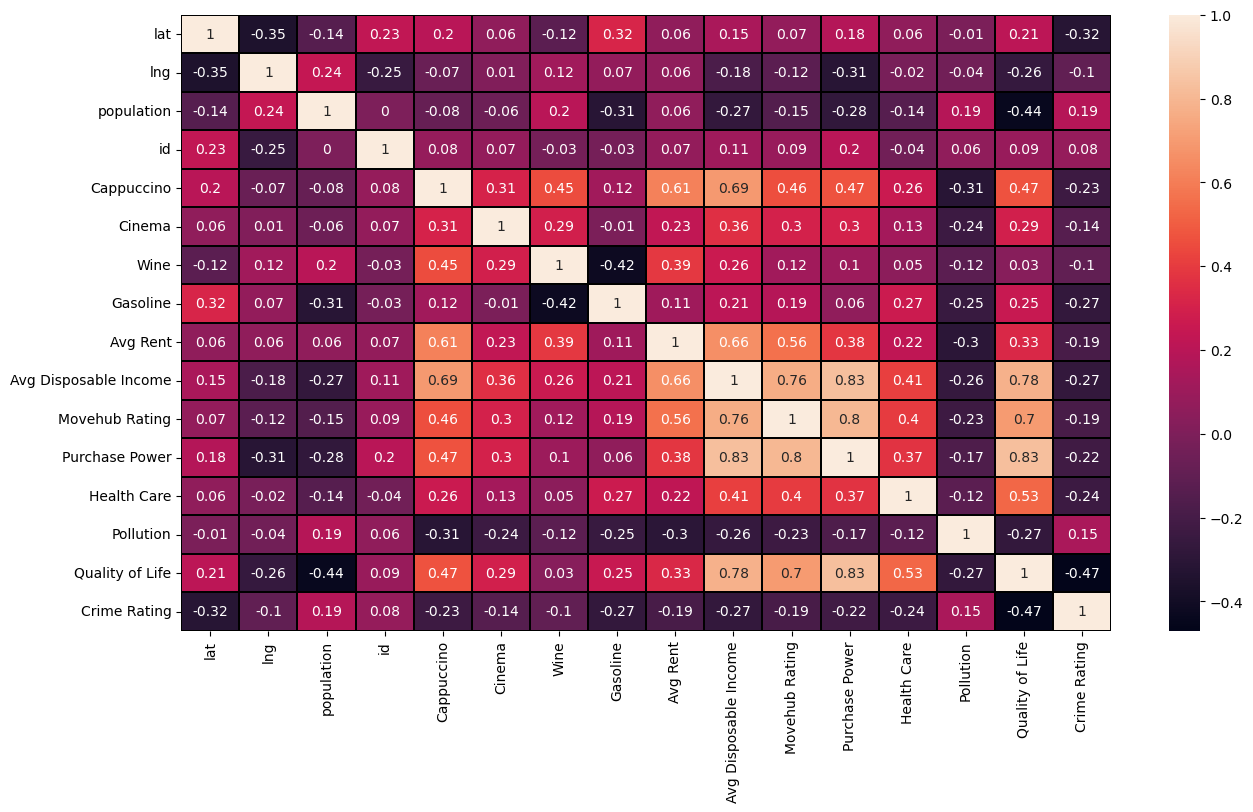

In [14]:
plt.figure(figsize=(15,8))
sb.heatmap(round(df.corr(),2),annot=True,linewidths=0.3,linecolor='black')

## Data Preprocessing

In [15]:
#Missing value treatment
df.capital.fillna(df['capital'].mode()[0],inplace=True)
df.admin_name.fillna(df['admin_name'].mode()[0],inplace=True)
df.isnull().sum()

City                     0
Country                  0
city_ascii               0
lat                      0
lng                      0
country                  0
iso2                     0
iso3                     0
admin_name               0
capital                  0
population               0
id                       0
Cappuccino               0
Cinema                   0
Wine                     0
Gasoline                 0
Avg Rent                 0
Avg Disposable Income    0
Movehub Rating           0
Purchase Power           0
Health Care              0
Pollution                0
Quality of Life          0
Crime Rating             0
dtype: int64

In [16]:
#Categorizing Categorical & Numeric Data Type
from tabulate import tabulate
cat=[]
con=[]
for i in df.columns:
    if df[i].nunique()<30:
        cat.append(i)
    else:
        con.append(i)

print(tabulate({'Categorical':cat,'Numerical':con},headers=['Categorical','Numerical']))

Categorical    Numerical
-------------  ---------------------
capital        City
               Country
               city_ascii
               lat
               lng
               country
               iso2
               iso3
               admin_name
               population
               id
               Cappuccino
               Cinema
               Wine
               Gasoline
               Avg Rent
               Avg Disposable Income
               Movehub Rating
               Purchase Power
               Health Care
               Pollution
               Quality of Life
               Crime Rating


In [17]:
#Label Encoding

lst=df.select_dtypes(include='object')
lbl=LabelEncoder()
for i in lst:
    df[i]=lbl.fit_transform(df[i])

In [18]:
#Data Scaling

data=df.drop(['lat','lng','id'],axis=1)
sc=StandardScaler()
df_scale=sc.fit_transform(data)
df_scale=pd.DataFrame(df_scale,columns=data.columns)

In [19]:
df_final=pd.concat([data,df[['lat','lng','id']]],axis=1)
df_final.head()

,City,Country,city_ascii,country,iso2,iso3,admin_name,capital,population,Cappuccino,...,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating,lat,lng,id
0,128,75,128,74,73,74,47,2,1822394.0,1.96,...,2013.61,84.39,71.07,76.01,70.75,82.33,55.07,28.4772,-81.3369,1840015099
1,129,48,129,48,52,52,110,2,693494.0,3.36,...,2800.92,82.09,52.51,88.19,29.39,71.27,35.53,59.9111,10.7528,1578324706
2,130,12,130,12,13,13,109,2,989567.0,2.39,...,2900.68,87.69,91.85,66.02,33.55,86.11,22.25,45.4247,-75.6950,1124399363
3,131,74,131,73,28,28,111,2,154600.0,2.49,...,1693.96,80.94,50.33,66.20,11.48,72.09,24.22,51.7519,-1.2578,1826689568
4,139,21,139,20,22,22,114,2,2011388.0,1.22,...,196.13,67.15,14.24,32.41,14.76,46.43,48.36,-0.2186,-78.5097,1218441993


In [20]:
x=df_final

# Task 2 : Finding K value

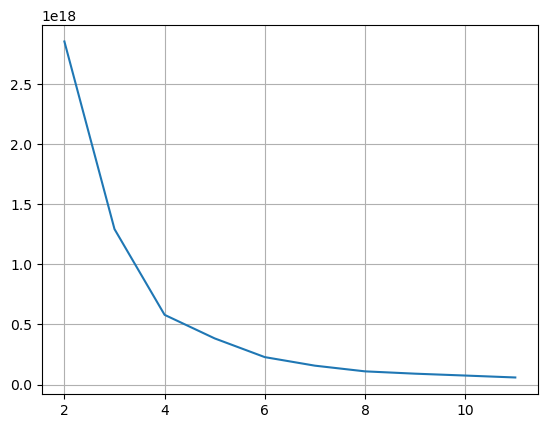

In [21]:

WCSS=[]
for k in range(2,12):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(x)
    WCSS.append(kmeans_model.inertia_)
    
plt.plot(range(2,12), WCSS)
plt.grid(True)

For n_clusters = 2 The average silhouette_score is : 0.6972288011853158
For n_clusters = 3 The average silhouette_score is : 0.6360435828465982
For n_clusters = 4 The average silhouette_score is : 0.6605826848151405
For n_clusters = 5 The average silhouette_score is : 0.6679024945831356
For n_clusters = 6 The average silhouette_score is : 0.677867469586383
For n_clusters = 7 The average silhouette_score is : 0.6873582792398304


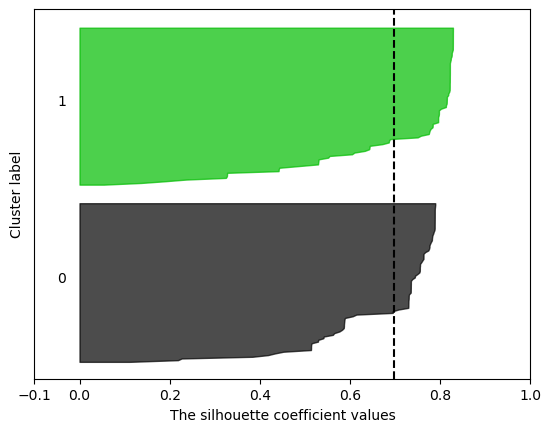

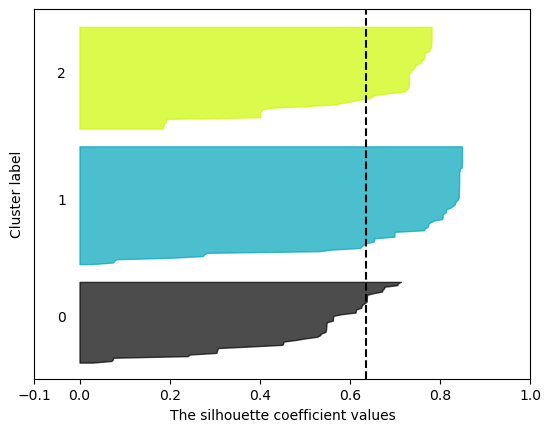

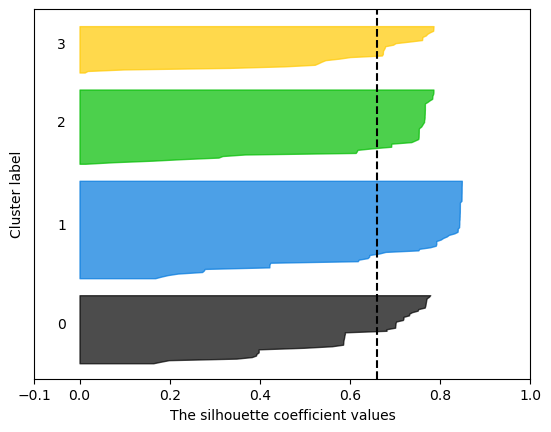

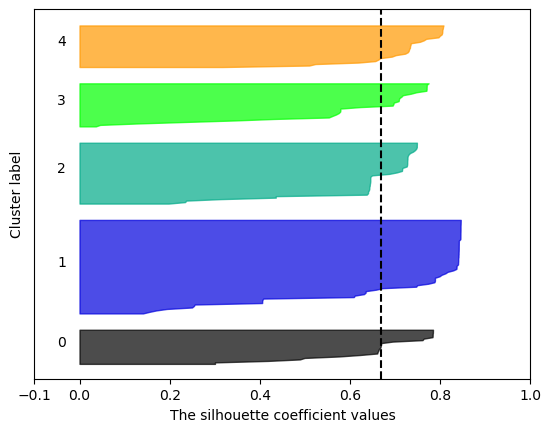

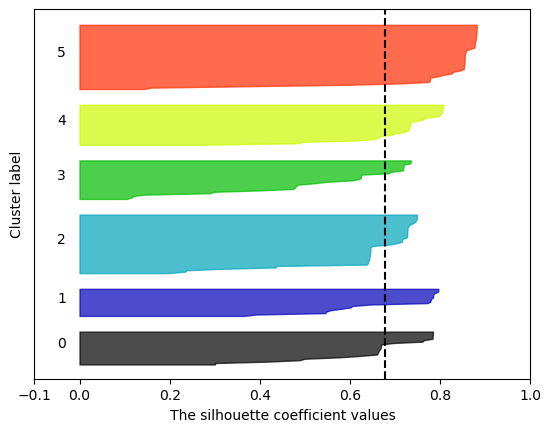

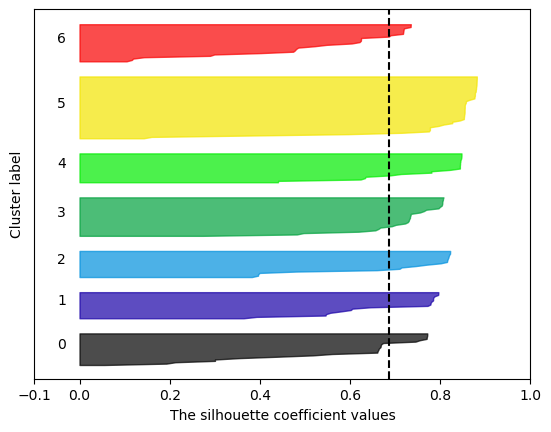

In [22]:
#Representing clusters using different colors

#optimum value of k using silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
 # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
 # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
     # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

### Optimum k value is 7

# Task 3: 

In [23]:
#Using the kmeans algorithm to build the model and fit your dataset to train the model

In [24]:
Kmeans_model=KMeans(n_clusters=7)
Kmeans_model.fit(x)

KMeans(n_clusters=7)

In [25]:
k_labels= Kmeans_model.labels_
k_labels

array([3, 5, 6, 3, 4, 1, 0, 3, 5, 4, 0, 5, 2, 6, 3, 5, 2, 4, 5, 6, 1, 2,
       5, 5, 6, 4, 3, 2, 6, 1, 6, 5, 1, 4, 4, 0, 2, 2, 3, 3, 3, 3, 4, 4,
       3, 5, 5, 3, 6, 6, 6, 6, 0, 1, 3, 5, 3, 2, 1, 3, 5, 4, 6, 6, 4, 2,
       0, 2, 3, 3, 3, 6, 6, 6, 2, 6, 0, 2, 4, 0, 0, 5, 4, 1, 2, 5, 3, 2,
       2, 6, 2, 5, 0, 2, 6, 4, 5, 4, 2, 0, 5, 5, 2, 2, 1, 0, 1, 3, 0, 1,
       2, 3, 6, 0, 3, 2, 1, 1, 1, 1, 6, 3, 1, 0, 5, 4, 3, 3, 3, 3, 5, 1,
       3, 0, 3, 0, 5, 2, 0, 3, 2, 2, 4, 6, 6, 1, 4, 2, 3, 3, 5, 5, 3, 1,
       3, 3, 5, 4, 5, 3, 1, 3, 3, 3, 2, 4, 3, 0, 2, 3, 0, 5, 4, 3, 2, 4,
       3, 3, 4, 0, 1, 2, 5, 3, 4, 4, 3, 5, 3])

In [26]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot:>

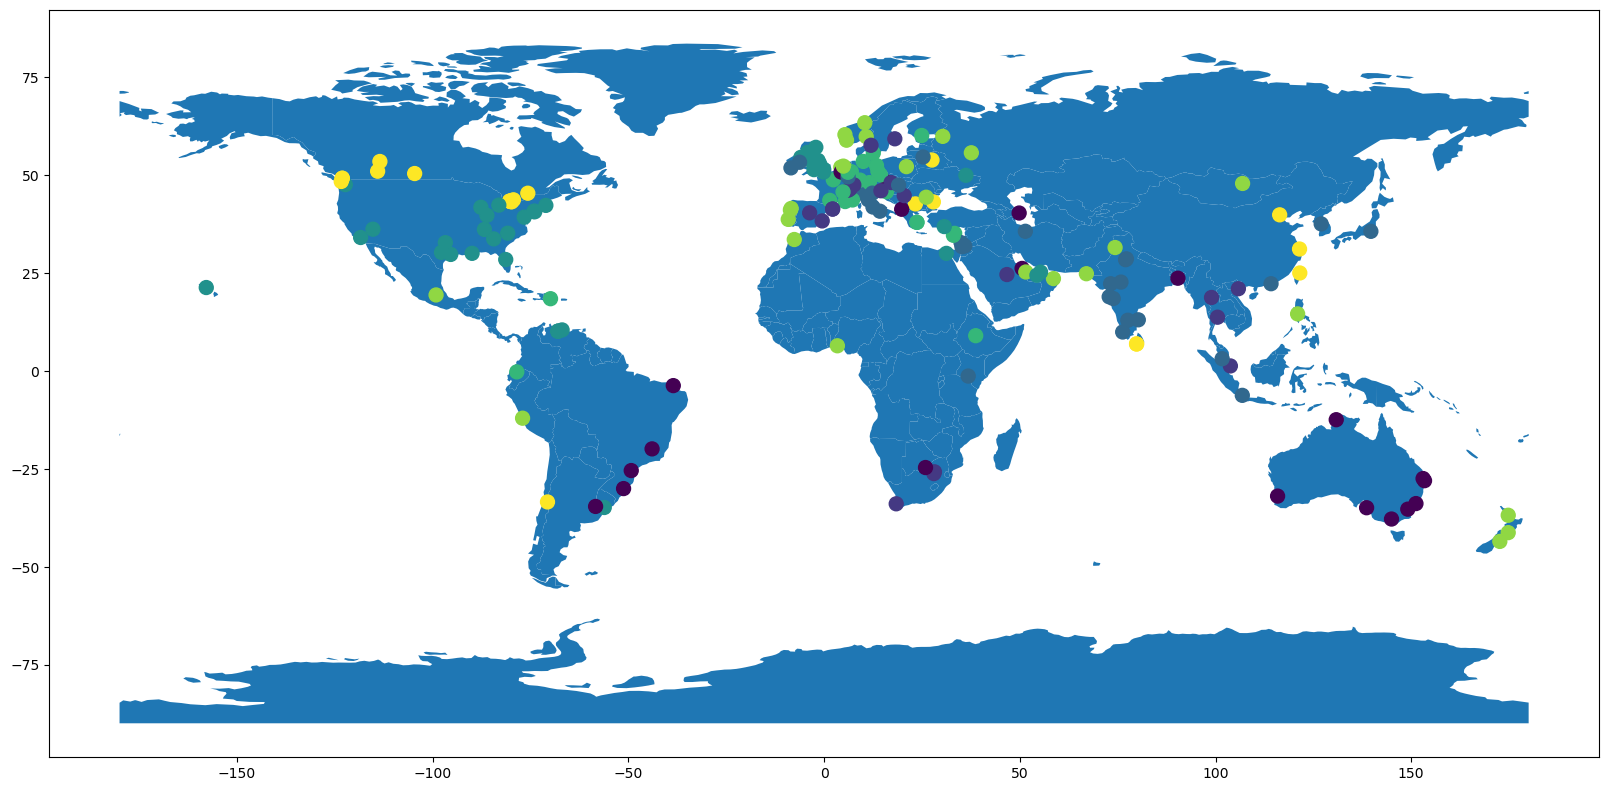

In [27]:
#Plotting Clustered Cities onto world map using geopandas liabrary

geometry=[Point(xy) for xy in zip(df_final['lng'],df_final['lat'])]
gdf=GeoDataFrame(df_final,geometry=geometry)
world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20,10)),marker='o',c=k_labels.astype(float),markersize=100)

<AxesSubplot:>

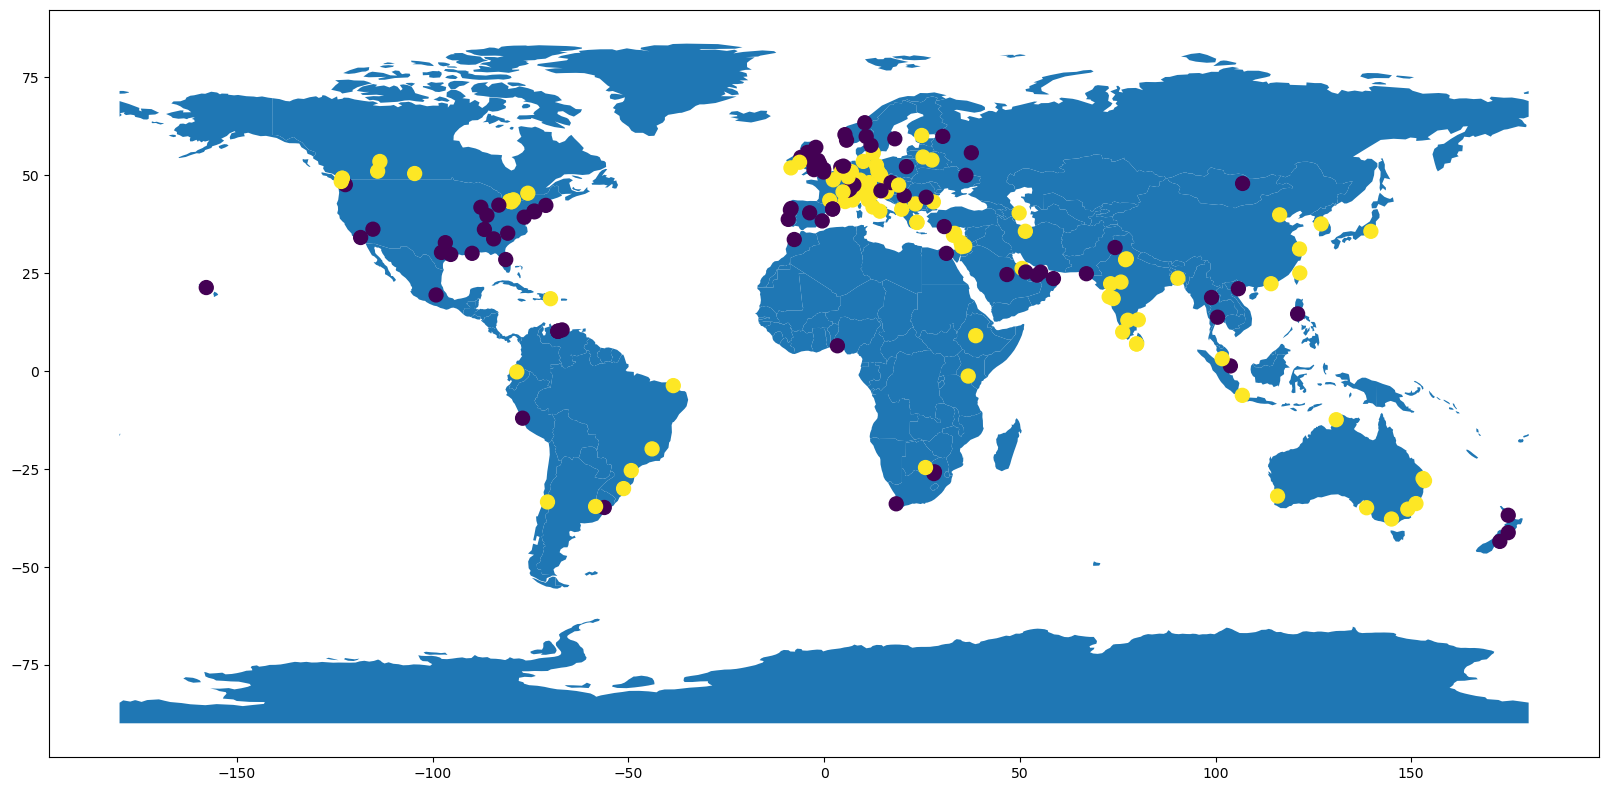

In [28]:
#Showing distribution of cities in clusters when k=2

Kmeans_model_2 = KMeans(n_clusters=2)
Kmeans_model_2.fit(x)
Kmeans_model_2.cluster_centers_
kmeans_label2=Kmeans_model_2.labels_

#ploting clustered data onto map
geometry=[Point(xy) for xy in zip(df_final['lng'],df_final['lat'])]

#longitude capture in x and latitude in y
gdf=GeoDataFrame(df_final,geometry=geometry)

#this is a simple map that goes with geopandas
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

gdf.plot(ax=world.plot(figsize=(20,10)),marker="o",c=kmeans_label2.astype(float),markersize=100)

<AxesSubplot:>

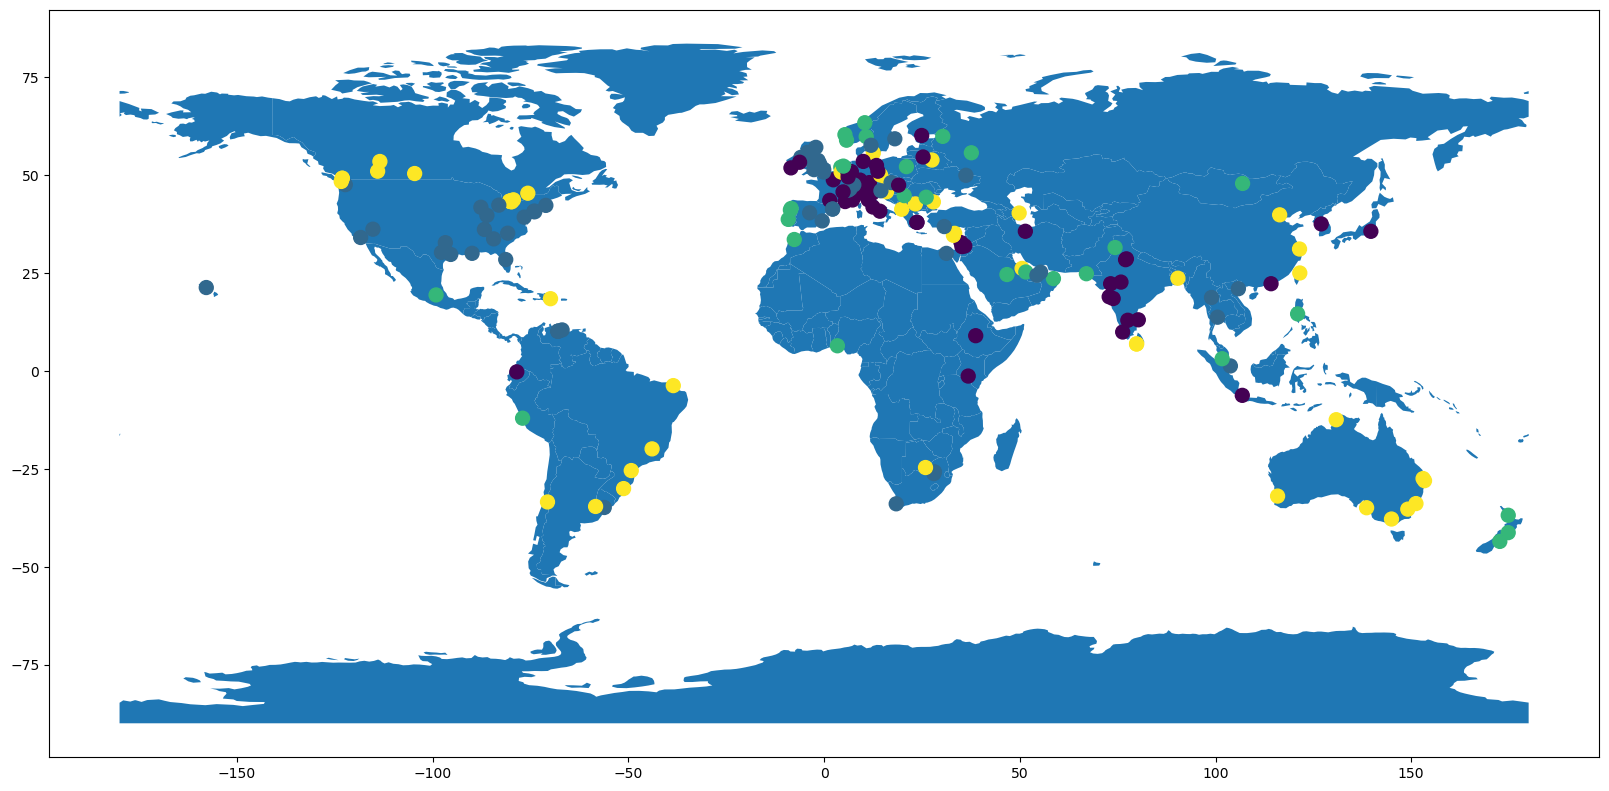

In [29]:
#Showing distribution of cities in clusters when k=4

Kmeans_model_4 = KMeans(n_clusters=4)
Kmeans_model_4.fit(x)
Kmeans_model_4.cluster_centers_
kmeans_label4=Kmeans_model_4.labels_

#ploting clustered data onto map
geometry=[Point(xy) for xy in zip(df_final['lng'],df_final['lat'])]

#longitude capture in x and latitude in y
gdf=GeoDataFrame(df_final,geometry=geometry)

#this is a simple map that goes with geopandas
world=gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

gdf.plot(ax=world.plot(figsize=(20,10)),marker="o",c=kmeans_label4.astype(float),markersize=100)